In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import ImageExpDataset

In [2]:
dataset = ImageExpDataset(
    fold_file='../../../mongochu-local/AImongo_img/train_folds.csv',
    image_file_path='../../../mongochu-local/AImongo_img/C1-P1_train/',
    folds=[0,1,2],
    image_height=224,
    image_width=224,
    mean=(0.485,0.456,0.406),
    std=(0.229,0.224,0.225)
)
mean=(0.485,0.456,0.406)
std=(0.229,0.224,0.225)

tensor(1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


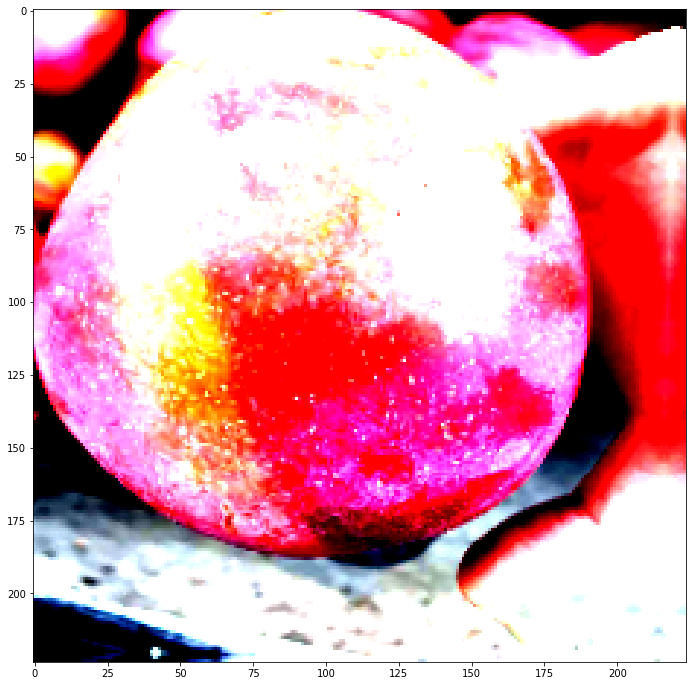

In [3]:
fig, ax = plt.subplots(figsize=(20,12))
i = 2
print(dataset[i]['label'])
ax.imshow(np.transpose(dataset[i]['image'],(2,1,0)))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

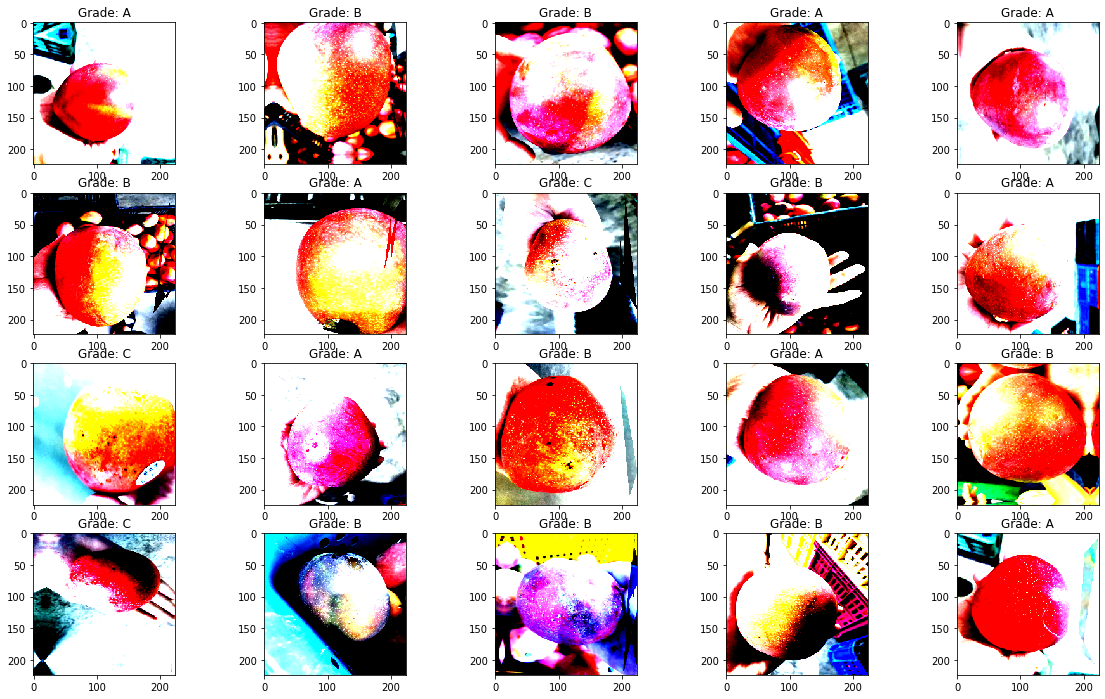

In [4]:
ind = 0
fig, ax = plt.subplots(4,5,figsize=(20,12))
for i, axi in enumerate(ax.flat):
    img = dataset[i+ind]['image']
    label = dataset[i+ind]['label']
    np_img = img.numpy()
    axi.imshow(np.transpose(np_img, (2,1,0)))
    class_map = {0:'A',1:'B',2:'C'}
    axi.set_title(f'Grade: {class_map[label.numpy().item(0)]}')
plt.show()